<a href="https://colab.research.google.com/github/jvl1ana/juliva_uK259/blob/main/Kopie_von_04_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/8ce0e9b71dc7667296419d8ab35fc6dc930b78e8/demos/UnsupervisedML.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The aim of clustering is to automatically find groups of similar datapoints in unlabeled data. In this exercise your aim will be to implement the k-Means algorithm and apply it to a set of random data.

[[-7.68905443  6.62034649]
 [-9.57651383 -6.93440446]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [-5.67841327 -7.28818497]
 [-6.04929137 -7.73619342]
 [-6.27824322  7.22746302]
 [-6.60917037 -6.9303477 ]
 [ 3.57225841  1.8307902 ]
 [-7.50444577 -6.85401854]]
[3 2 1 0 2 2 3 2 1 2]


[]

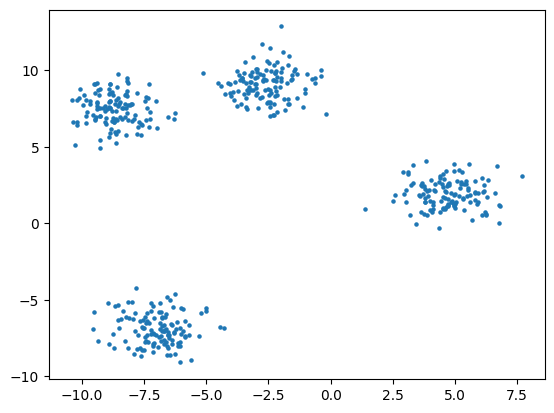

In [127]:
import seaborn as sns #for plotting
from sklearn.datasets import make_blobs #data generator

# automatically generate a random dataset with underlying clusters. You can play around with the parameters of this generator function to test your algorithm.
# true labels are the actual group a point belongs to. you can use them later to check the quality of your algorithm

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
# automatically generate random dataset



features, true_labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1,
    random_state=42
)

print(features[:10])
print( true_labels[:10])
fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], s=5)#, c=true_labels)
plt.plot()
# visualize the data with the true labels to get an overview of the data




In [128]:
# implement the kmeans algorithm
# it should take a 2D array of features and number of Groups as Input
# and return a 1D array of estimated group membership of each point, and the coordinates of the cluster centers.
import numpy as np

def k_means(featureArray, nGroups, max_iters=100):
    np.random.seed(42)
    random_indices = np.random.choice(len(featureArray), nGroups, replace=False)
    centroids = featureArray[random_indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(featureArray[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([featureArray[labels == i].mean(axis=0) for i in range(nGroups)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [98]:
def k_means(featureArray, nGroups, max_iters=100):
  np.random.seed(42)
  random_indices = np.random.choice(len(featureArray), nGroups, replace=False)
  centroids = featureArray[random_indices]





<function __main__.k_means(featureArray, nGroups, max_iters=100)>

In [129]:
# apply k means to your dataset to cluster the data

estimated_labels, cluster_centers = k_means(features, 4)


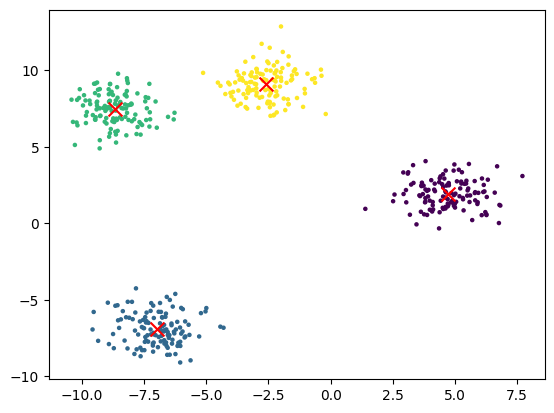

In [130]:
# visualize your results

plt.scatter(features[:, 0], features[:, 1], c=estimated_labels, s=5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)
plt.show()

## Principal Component Analysis
Principal Component Analysis (PCA) attempts to identify the principal components (called "eigenvectors") that best describe the variance in the data using these PCs, we can visualize points in a lower dimension (*d*) by only using a combination of the first *d* PCs.

Try to use PCA on the dataset below to summarize multiple axies into a 2D plot. Can you find out hom much variance of the data you can represent with only 2 Principal Components?

In [48]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
